# Práctica Final: Clasificación de Documentos con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación de documentos. El objetivo es construir un modelo capaz de clasificar automáticamente documentos en categorías predefinidas.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

## Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido

In [1]:
# Creamos un base path por si se desea utilizar archivos ubicados en otra ruta
base_path = './'

In [2]:
# Si vamos a usar google drive, tenemos que descomentar el siguiente código

## Damos permiso a google drive y montamos la carpeta
#from google.colab import drive
#drive.mount('/content/drive')
#
## actualizamos el base path para usar la carpeta de google drive
#base_path = '/content/drive/MyDrive/'

In [3]:
# importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a trabajar con datasets que tienen datos de reviews de amazon.

Los datasets ya estan balanceados y contienen solos dos campos.

- rating: Campo numerico que contiene 0 para review NEGATIVA y 1 para review POSITIVA
- text: Campo de texto que contiene las reviews

In [4]:
# importamos los datasets de train y test
train_data = pd.read_csv(base_path + 'train_data.csv', sep=';')
test_data = pd.read_csv(base_path + 'test_data.csv', sep=';')

train_data.shape, test_data.shape

((58448, 2), (14612, 2))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58448 entries, 0 to 58447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  58448 non-null  int64 
 1   text    58441 non-null  object
dtypes: int64(1), object(1)
memory usage: 913.4+ KB


In [6]:
# como tenemos NAN en 'text' eliminamos las filas completas
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58441 entries, 0 to 58447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  58441 non-null  int64 
 1   text    58441 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14612 entries, 0 to 14611
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  14612 non-null  int64 
 1   text    14608 non-null  object
dtypes: int64(1), object(1)
memory usage: 228.4+ KB


In [8]:
# como tenemos NAN en 'text' eliminamos las filas completas
test_data = train_data.dropna()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58441 entries, 0 to 58447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  58441 non-null  int64 
 1   text    58441 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
# Exploramos los datos de Train Solamente
train_data.head()

rating                                               text
0       0  Only if you want a bunch of vague background R...
1       1  THESE ARE A GREAT SET OF CDS  FOR THOSE WHO LI...
2       1  Sounds wonderful. Came on time.  As promised. ...
3       1  Barton and Sweeney were regulars in my college...
4       0  Was supposed to have 2 CDs.  But there was onl...

<Axes: xlabel='rating', ylabel='count'>

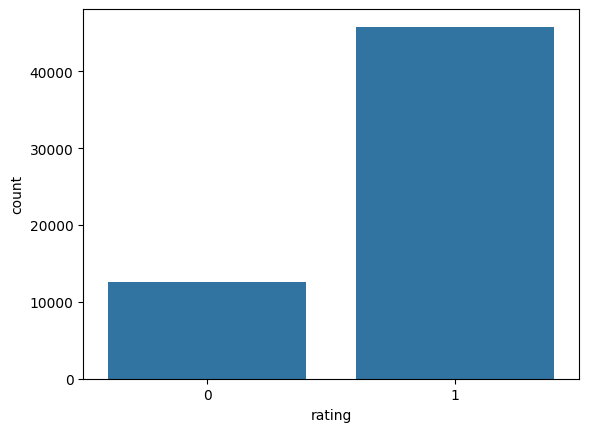

In [10]:
# Count Plot de Rating
sns.countplot(x='rating', data=train_data)

## Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

In [11]:
# Librerias requeridas
! pip install num2words
! pip install nltk
! pip install autocorrect
! pip install beautifulsoup4
! pip install html5lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c90d80f1482b591c6ca0ee6644ffbb51118eef8ffde8fafbef9e0ea74add331f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=727ec392fe3f0e7e06220365caab8ba29ab7228d07ad338513f6af123a0e04a3
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [12]:
import text_preprocess as prep

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
# Probamos que retorna el preprocesado
prep.preprocessing("""This is just a test.
But if it wasn't a test, it would make for a Great movie review!""")

'test test would make great movi review'

In [14]:
# Como son muchas filas a preprocesar vamos recortar los datasets
train_data_slim = train_data[:800]
train_data_slim['rating'].value_counts()

rating
1    616
0    184
Name: count, dtype: int64

In [15]:
test_data_slim = test_data[:200]
test_data_slim['rating'].value_counts()

rating
1    150
0     50
Name: count, dtype: int64

In [16]:
# Preprocesado del dataset TRAIN
train_data_slim["text"] = [prep.preprocessing(text) for text in train_data_slim["text"]]

/content/text_preprocess.py:84: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  output = BeautifulSoup(output, "html5lib").get_text()
<ipython-input-16-b36d90233214>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_slim["text"] = [prep.preprocessing(text) for text in train_data_slim["text"]]


In [17]:
train_data_slim.head()

rating                                               text
0       0  want bunch vagu background rector stuff buy al...
1       1          great set cd like old style countri music
2       1          sound wonder came time promis packag good
3       1  barton sweeney regular colleg town saw least m...
4       0                                  suppos two cd one

In [18]:
train_data_slim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  800 non-null    int64 
 1   text    800 non-null    object
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


In [19]:
# Preprocesado del dataset TEST
test_data_slim["text"] = [prep.preprocessing(text) for text in test_data_slim["text"]]


/content/text_preprocess.py:84: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  output = BeautifulSoup(output, "html5lib").get_text()
<ipython-input-19-b8567f7e0f3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_slim["text"] = [prep.preprocessing(text) for text in test_data_slim["text"]]


In [20]:
test_data_slim.head()

rating                                               text
0       0  want bunch vagu background rector stuff buy al...
1       1          great set cd like old style countri music
2       1          sound wonder came time promis packag good
3       1  barton sweeney regular colleg town saw least m...
4       0                                  suppos two cd one

In [21]:
test_data_slim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  200 non-null    int64 
 1   text    200 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [22]:
# guardamos los dataset
train_data_slim.to_csv(base_path + 'train_data_preprocesado.csv', sep=';', index=False)
test_data_slim.to_csv(base_path + 'test_data_preprocesado.csv', sep=';', index=False)

In [23]:
# Comprobamos a abrirlos de nuevo
train_data = pd.read_csv(base_path + 'train_data_preprocesado.csv', sep=';')
test_data = pd.read_csv(base_path + 'test_data_preprocesado.csv', sep=';')
train_data.shape, test_data.shape

((800, 2), (200, 2))

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  800 non-null    int64 
 1   text    798 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [25]:
# como tenemos NAN en 'text' eliminamos las filas completas
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  798 non-null    int64 
 1   text    798 non-null    object
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  200 non-null    int64 
 1   text    200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [27]:
# Preparamos la dara para usar BoW

# Separamos las reviews en datasets de data
data_train = [text for text in train_data['text']]
data_test = [text for text in test_data['text']]
len(data_train), len(data_test)

(798, 200)

In [28]:
# Creamos dos datasets con palabras
words_train = [str(text).split() for text in data_train]
words_test = [str(text).split() for text in data_test]
len(words_train), len(words_test)

(798, 200)

In [29]:
# Separamos las reviews en datasets de labels
labels_train = [rating for rating in train_data['rating']]
labels_test = [rating for rating in test_data['rating']]
len(labels_train), len(labels_test)

(798, 200)

In [30]:
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])


--- Raw review ---
great set cd like old style countri music

--- Preprocessed words ---
['great', 'set', 'cd', 'like', 'old', 'style', 'countri', 'music']

--- Label ---
1


In [31]:
# Obtenos el tamaño maximo de palabras en un documento
vocabulary_train_size = max(len(x) for x in words_train )
vocabulary_test_size = max(len(x) for x in words_test )
vocabulary_train_size, vocabulary_test_size

(839, 839)

In [32]:
# librerias para BoW
! pip install scikit-learn

In [33]:
import bag_of_words as bow
import random

In [34]:
# Extraemos las features usando BoW
# usamos como tamaño de vocabulario la cantidad máxima de palabras encontradas en un documento
# Lo que encontramos es que en test hay mas palabras, por eso vamos a usar ese valor como límite
features_train, features_test, vocabulary = bow.extract_BoW_features(words_train,
                                                                 words_test,
                                                                 vocabulary_test_size)

print("Vocabulary: {} words".format(len(vocabulary)))

print("\nSample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Vocabulary: 839 words

Sample words: ['stanley', 'mountain', 'capitol', 'bit', 'natur', 'dylan', 'old', 'feel']

--- Preprocessed words ---
['long', 'time', 'consum', 'sea', 'song', 'chang', 'found', 'cd', 'adequ', 'best', 'represent', 'may', 'record', 'mystic', 'festiv', 'excel', 'venu', 'high', 'point', 'wade', 'water', 'much', 'present', 'rather', 'inspir', 'nonetheless', 'belong', 'librari', 'anyon', 'enjoy', 'sea', 'music']

--- Bag-of-Words features ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
import common

In [36]:
# preparamos el diccionariio para almacenar en pkl
preprocessed_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
preprocessed_data.keys()

dict_keys(['words_train', 'words_test', 'labels_train', 'labels_test'])

In [37]:
common.save_pkl(base_path + 'preprocessed_data.pkl', preprocessed_data)

In [38]:
# obtenes la data guardada
preprocessed_data = common.load_pkl(base_path + 'preprocessed_data.pkl')
preprocessed_data.keys()

dict_keys(['words_train', 'words_test', 'labels_train', 'labels_test'])

In [39]:
# Ahora guardamos las features de BoW
bow_features = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
bow_features.keys()

dict_keys(['features_train', 'features_test', 'vocabulary'])

In [40]:
common.save_pkl(base_path + 'bow_features.pkl', bow_features)

In [41]:
# obtenes la data guardada
bow_features = common.load_pkl(base_path + 'bow_features.pkl')
bow_features.keys()

dict_keys(['features_train', 'features_test', 'vocabulary'])

In [54]:
# Normalización de Features
import sklearn.preprocessing as pr

features_train = pr.normalize(features_train, axis=1)
features_test = pr.normalize(features_test, axis=1)

## Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

## Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.

In [43]:
# instalamos librerias
! pip install mlflow
! pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.1 MB/s eta 0:00:00


In [44]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
# creamos variables standard
x_features_train = features_train
y_labels_train = labels_train

x_features_test = features_test
y_labels_test = labels_test

In [46]:
# Configuramos una semilla que va a ser utilizada para entrenar todos los modelos
global_seed = 42

# Creamos un array de modelos an entrenar
# Como va a ser una revisión general de modelos, no se pone mucho enfasis
# en configurar los diferentes parámetres
models = []
models.append(("Random Forest", RandomForestClassifier(random_state=global_seed)))
models.append(("LASSO", lm.LogisticRegression(random_state=global_seed)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=global_seed)))
models.append(("SVM", SVC(random_state=global_seed)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=global_seed)
))

# Creamos arrays para almacenar los resultados
results = []
names = []

# setemos en 0 los mejores resultados
best_mean_result = 0
best_std_result = 0

# Corremos todos los modelos utilizando StratifiedKFlod y cross_val_score
for name, model in models:
  kfold = StratifiedKFold()
  cv_results = cross_val_score(model, x_features_train, y_labels_train, scoring='accuracy', cv=kfold)
  results.append(cv_results)
  names.append(name)
  print(name + ": mean(accuracy)=" + str(round(np.mean(cv_results), 3)) + ", std(accuracy)=" + str(round(np.std(cv_results), 3)))
  if (best_mean_result < np.mean(cv_results)) or \
    ((best_mean_result == np.mean(cv_results)) and (best_std_result > np.std(cv_results))):
    best_mean_result = np.mean(cv_results)
    best_std_result = np.std(cv_results)
    best_model_name = name
    best_model = model
print("\nEl mejor modelo es:\n" + best_model_name)


Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
LASSO: mean(accuracy)=0.787, std(accuracy)=0.008
KNN: mean(accuracy)=0.768, std(accuracy)=0.005
Decision Tree: mean(accuracy)=0.714, std(accuracy)=0.026
SVM: mean(accuracy)=0.784, std(accuracy)=0.014
Gradient Boosting: mean(accuracy)=0.786, std(accuracy)=0.015

El mejor modelo es:
Random Forest


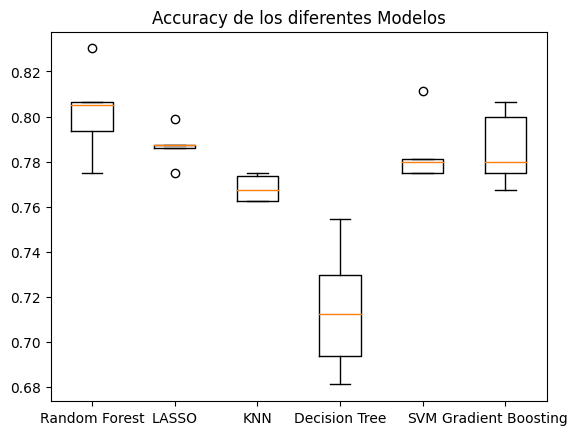

In [47]:
plt.boxplot(results, labels=names)
plt.title("Accuracy de los diferentes Modelos")
plt.show()

In [48]:
# Empezamos a probar mlfflow y ngrok
import mlflow
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = '2gQVbcWww7nwPPFQXwacWQT9KeL_4T3qkQ1AJjDsUL6NzYMLN'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

El tracking UI: https://3f2a-34-171-125-148.ngrok-free.app


In [49]:
import subprocess
import time

# Corremos todos los modelos utilizando StratifiedKFlod y cross_val_score
def best_model(models_names, x_features_train, x_features_test, y_labels_train, y_labels_test):
  # Configuramos una semilla que va a ser utilizada para entrenar todos los modelos
  global_seed = 42

  # Creamos un array de modelos an entrenar
  # Como va a ser una revisión general de modelos, no se pone mucho enfasis
  # en configurar los diferentes parámetres
  models = []
  if "RF" in models_names:
    models.append(("Random Forest", RandomForestClassifier(random_state=global_seed)))
  if "LS" in models_names:
    models.append(("LASSO", lm.LogisticRegression(random_state=global_seed)))
  if "KN" in models_names:
    models.append(("KNN", KNeighborsClassifier()))
  if "DT" in models_names:
    models.append(("Decision Tree", DecisionTreeClassifier(random_state=global_seed)))
  if "SV" in models_names:
    models.append(("SVM", SVC(random_state=global_seed)))
  if "GB" in models_names:
    models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=global_seed)
  ))
  # Creamos arrays para almacenar los resultados
  results = []
  names = []

  # setemos en 0 los mejores resultados
  best_mean_result = 0
  best_std_result = 0

  mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

  time.sleep(5)

  mlflow.set_experiment("Script Eleccion Modelo")

  for name, model in models:
    with mlflow.start_run() as run:
      kfold = StratifiedKFold()
      cv_results = cross_val_score(model, x_features_train, y_labels_train, scoring='accuracy', cv=kfold)
      results.append(cv_results)

      mlflow.log_metric('m1', np.mean(cv_results))
      mlflow.log_param('model', name)
      mlflow.log_param('accuracy', cv_results)
      mlflow.sklearn.log_model(model, 'clf_model')

      names.append(name)
      print(name + ": mean(accuracy)=" + str(round(np.mean(cv_results), 3)) + ", std(accuracy)=" + str(round(np.std(cv_results), 3)))

      if (best_mean_result < np.mean(cv_results)) or \
        ((best_mean_result == np.mean(cv_results)) and (best_std_result > np.std(cv_results))):
        best_mean_result = np.mean(cv_results)
        best_std_result = np.std(cv_results)
        best_model_name = name
        best_model = model

  return best_model, best_model_name


In [50]:
# probamos la generación de resultados y login en mlflow
models_names = ['RF', 'LS', 'KN', 'DT', 'SV', 'GB']

best_model(models_names, x_features_train, x_features_test, y_labels_train, y_labels_test)

2024/05/18 19:49:40 INFO mlflow.tracking.fluent: Experiment with name 'Script Eleccion Modelo' does not exist. Creating a new experiment.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
LASSO: mean(accuracy)=0.787, std(accuracy)=0.008
KNN: mean(accuracy)=0.768, std(accuracy)=0.005
Decision Tree: mean(accuracy)=0.714, std(accuracy)=0.026
SVM: mean(accuracy)=0.784, std(accuracy)=0.014
Gradient Boosting: mean(accuracy)=0.786, std(accuracy)=0.015


(RandomForestClassifier(random_state=42), 'Random Forest')

In [1]:
import common


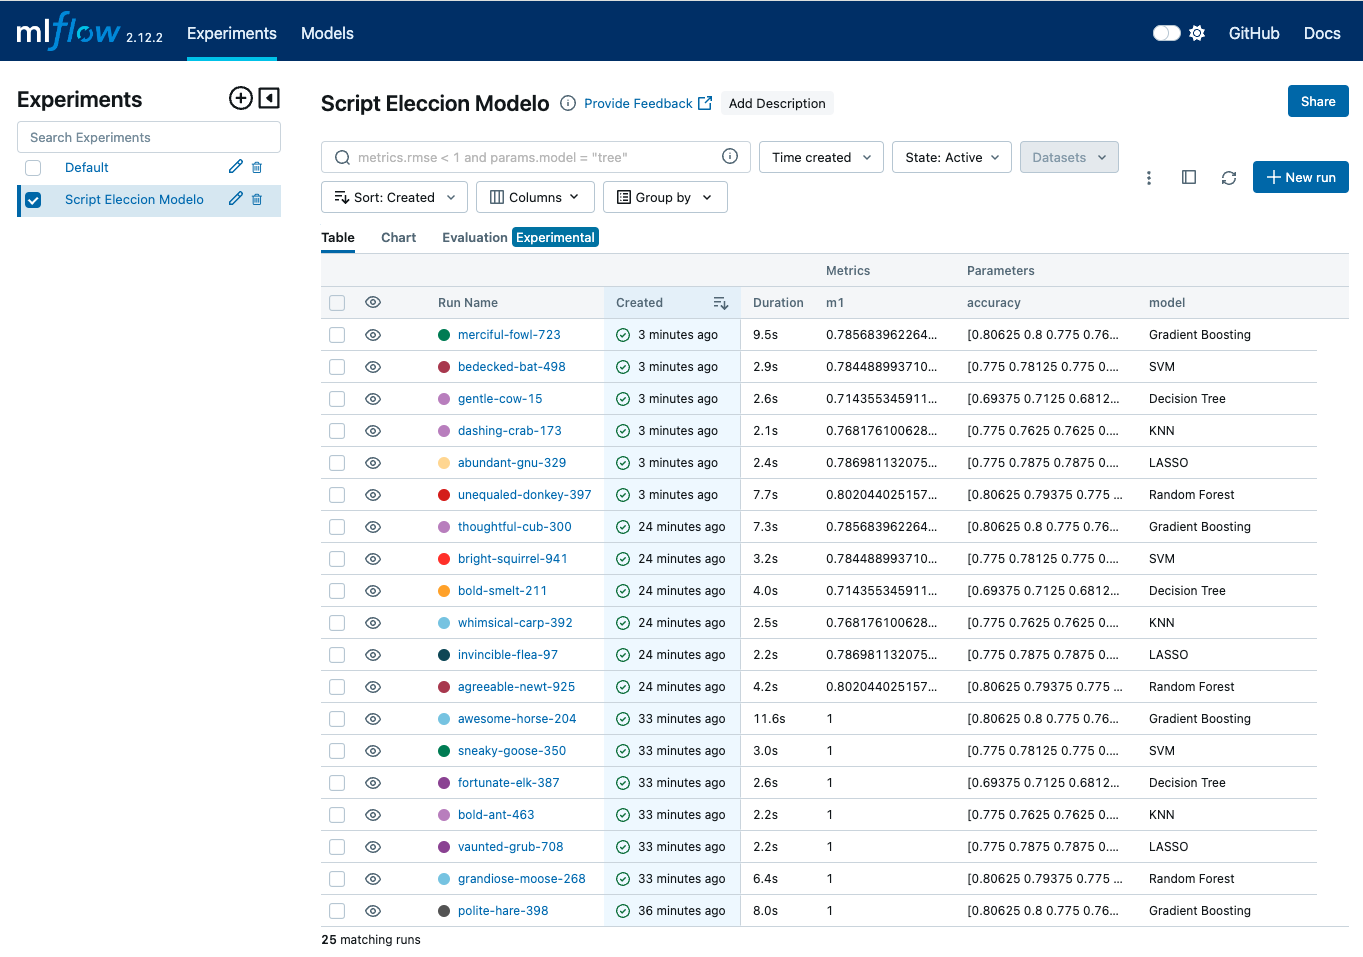

In [5]:
base_path = ''

# Revisamos la tabla
common.show_image(base_path + 'mlflow_001.png')


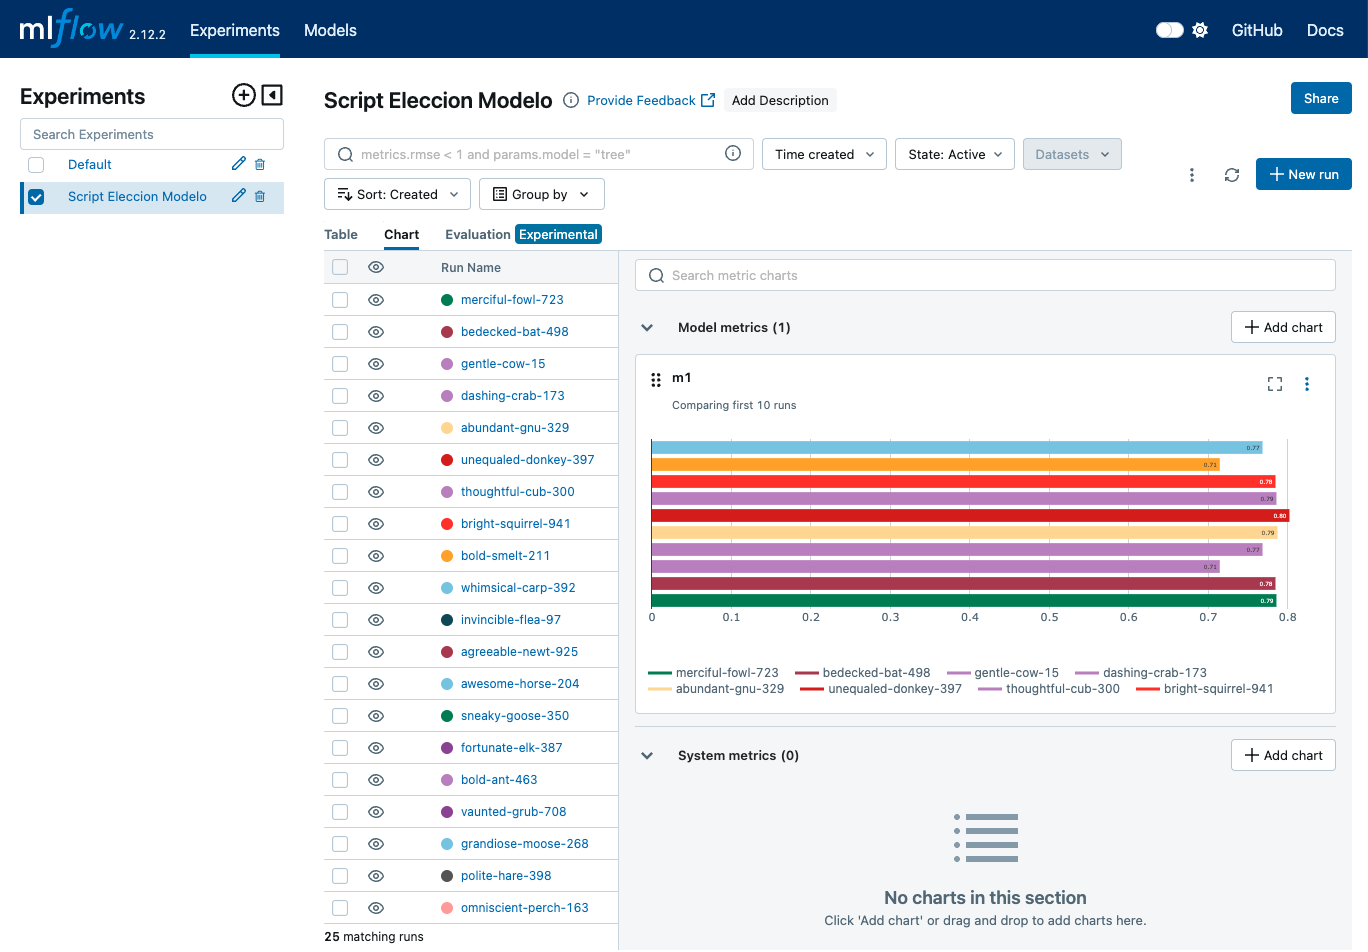

In [6]:
# Revisamos el chart
common.show_image(base_path + 'mlflow_002.png')


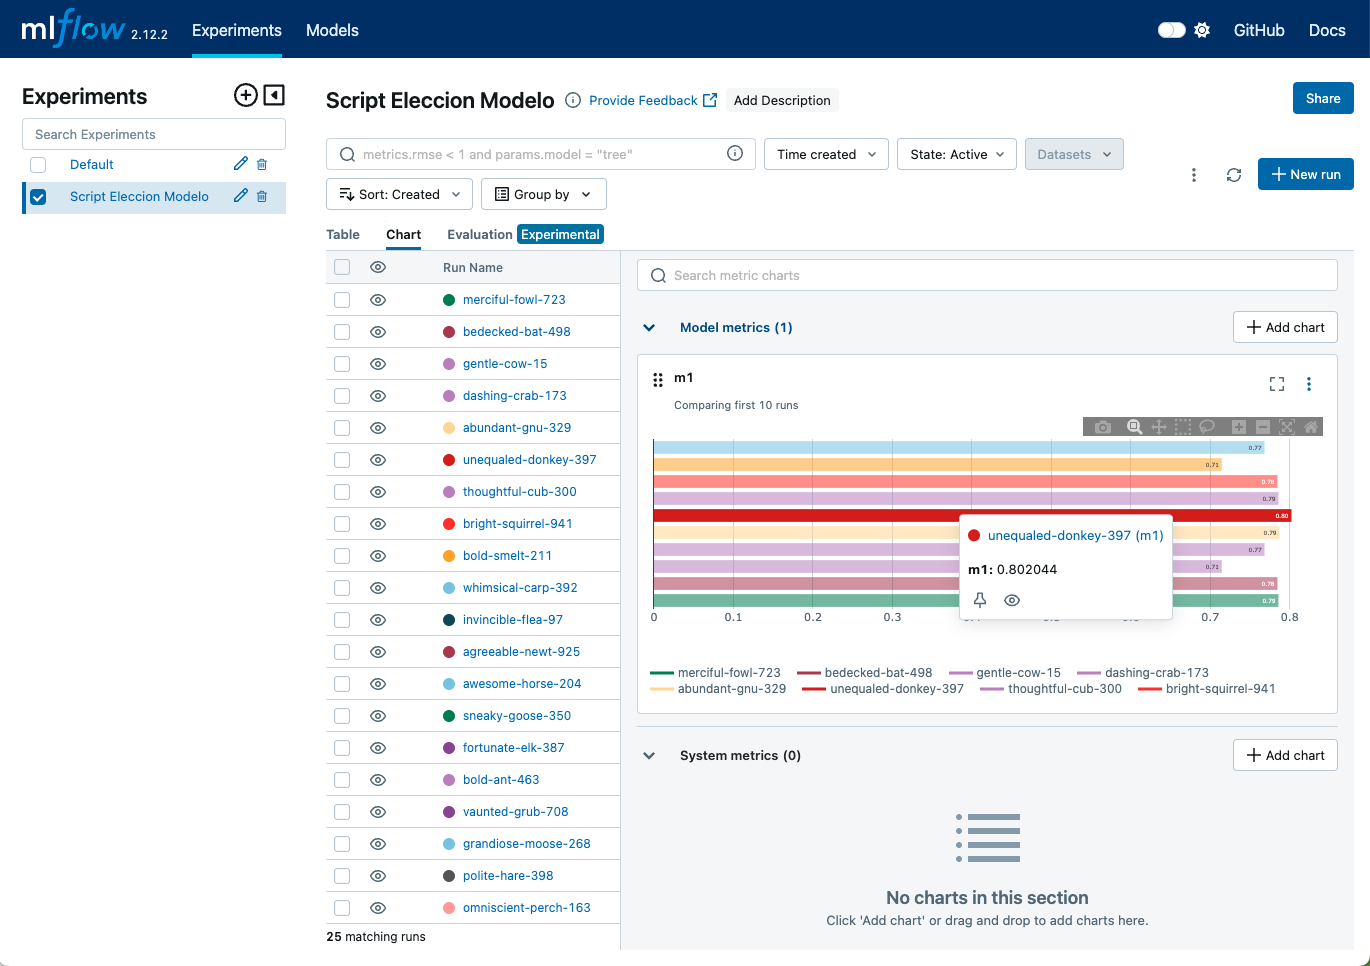

In [7]:
# Elegimos la métrica con mayor m1 para ver que contiene
common.show_image(base_path + 'mlflow_003.png')


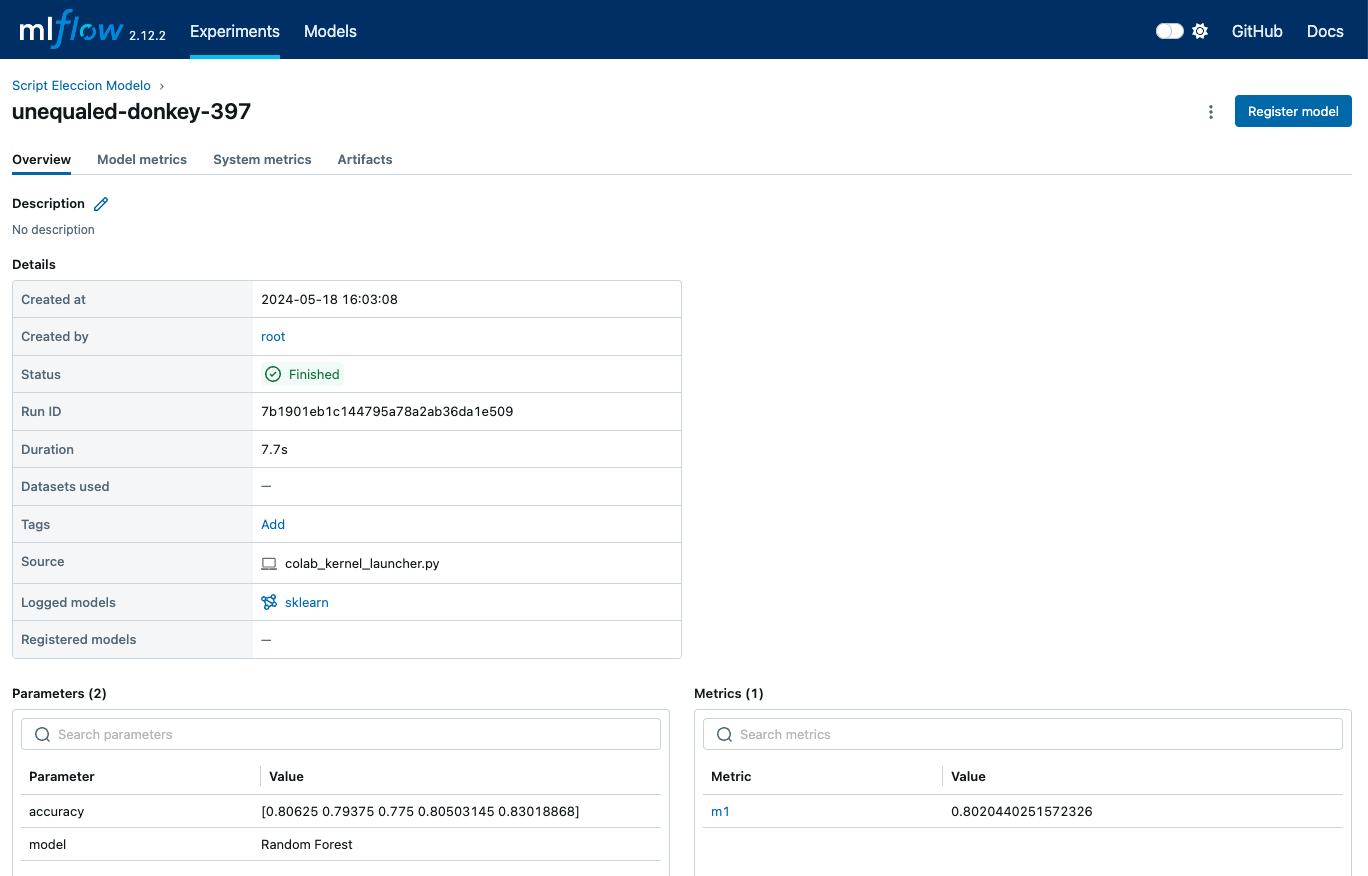

In [8]:
# Overview de la métrica con mejor m1
common.show_image(base_path + 'mlflow_004.png')

## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [1]:
# Empezamos a probar mlfflow y ngrok
import mlflow
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = '2gQVbcWww7nwPPFQXwacWQT9KeL_4T3qkQ1AJjDsUL6NzYMLN'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

El tracking UI: https://a64b-34-171-125-148.ngrok-free.app


In [12]:
! python3 mlflow_params.py

Traceback (most recent call last):
  File "/content/mlflow_params.py", line 133, in <module>
    main()
  File "/content/mlflow_params.py", line 94, in main
    best_model(models_names, experiment_text, 
  File "/content/mlflow_params.py", line 33, in best_model
    if "RF" in models_names:
TypeError: argument of type 'NoneType' is not iterable


In [2]:
! python3 mlflow_params.py \
--experiment_text 'mlflow params' \
--models 'RF' 'LS' 'KN' 'DT' 'SV' 'GB'

[2024-05-18 20:43:23 +0000] [17875] [INFO] Starting gunicorn 22.0.0
[2024-05-18 20:43:23 +0000] [17875] [INFO] Listening at: http://127.0.0.1:5000 (17875)
[2024-05-18 20:43:23 +0000] [17875] [INFO] Using worker: sync
[2024-05-18 20:43:23 +0000] [17876] [INFO] Booting worker with pid: 17876
[2024-05-18 20:43:24 +0000] [17877] [INFO] Booting worker with pid: 17877
[2024-05-18 20:43:24 +0000] [17882] [INFO] Booting worker with pid: 17882
[2024-05-18 20:43:24 +0000] [17883] [INFO] Booting worker with pid: 17883
Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setup

In [3]:
import common


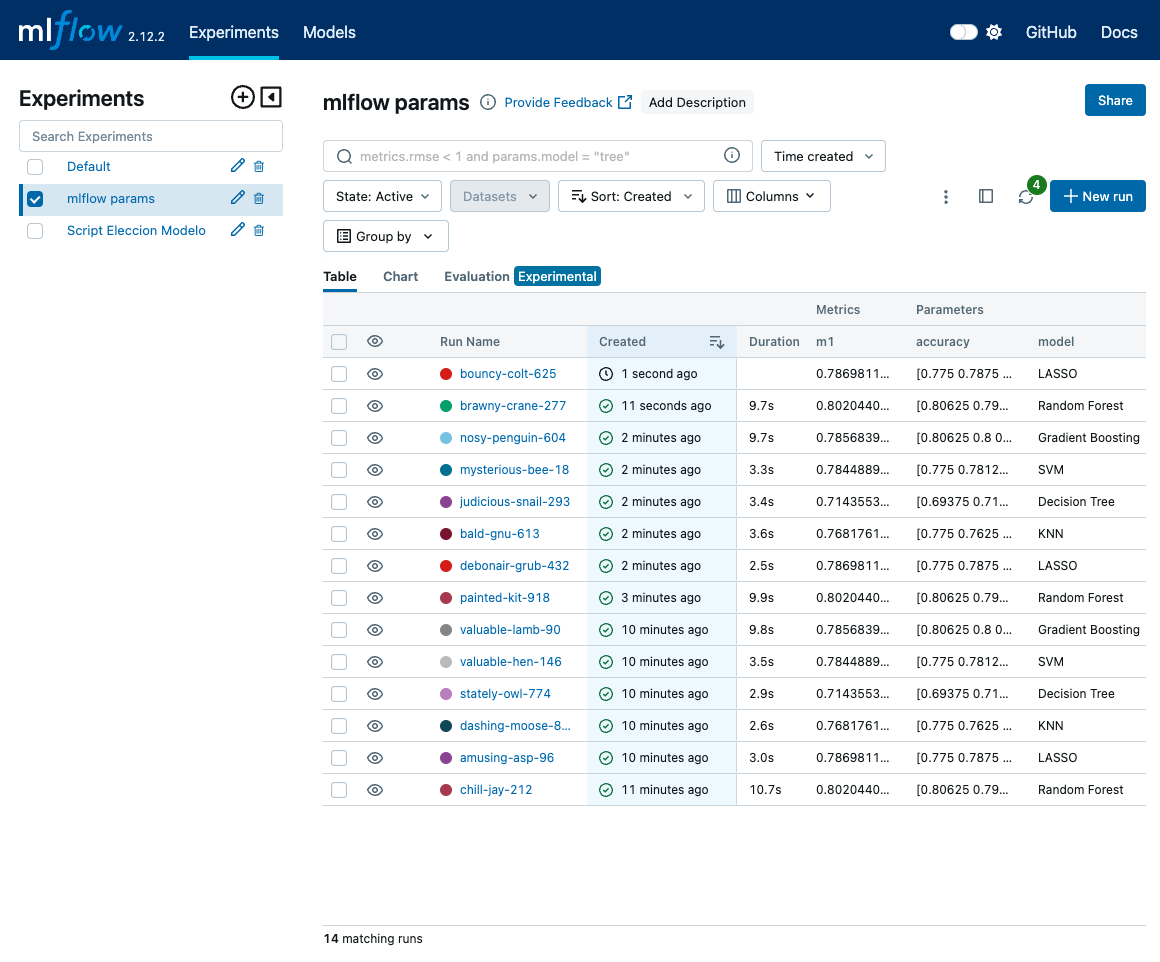

In [4]:
base_path = ''

# Revisamos la tabla
common.show_image(base_path + 'mlflow_params_001.png')


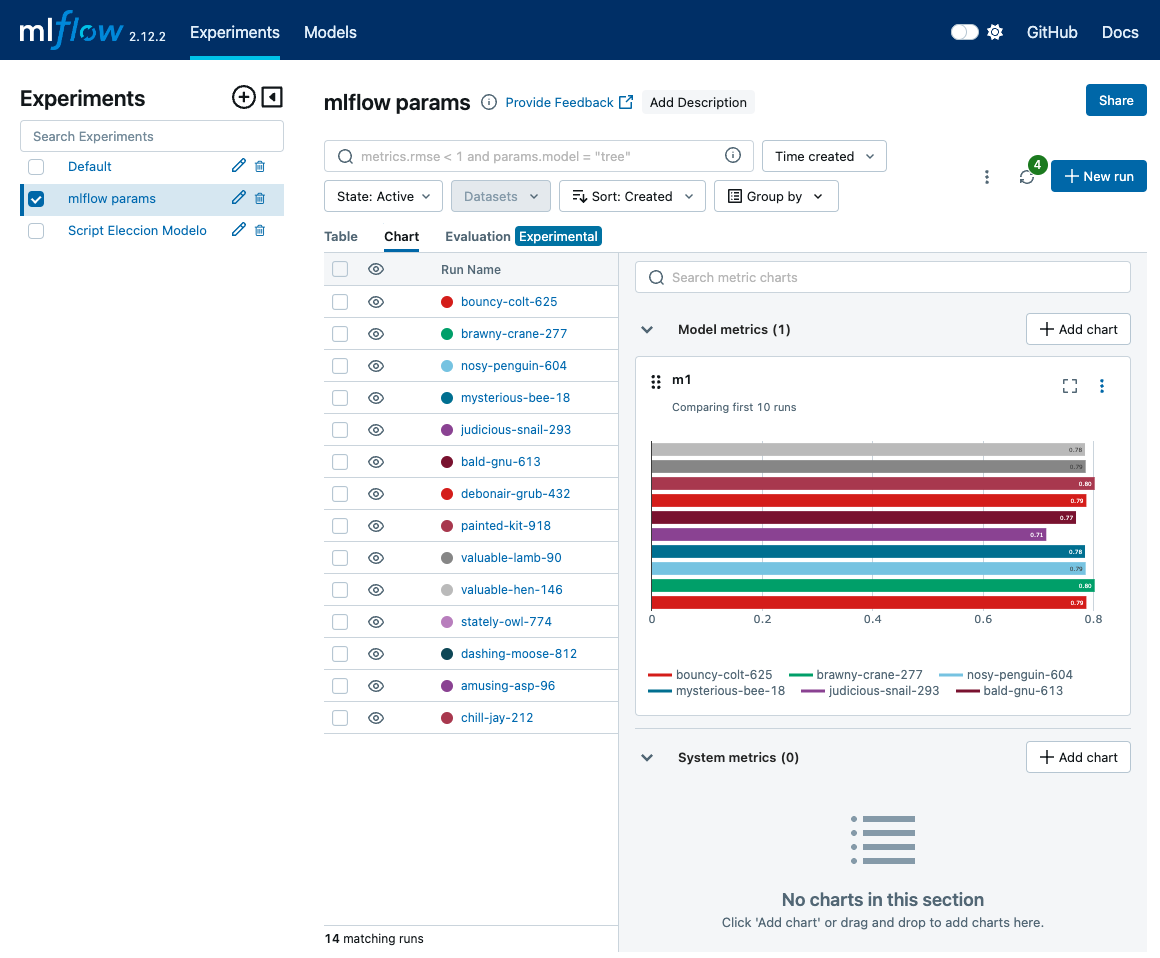

In [5]:
# Revisamos el chart
common.show_image(base_path + 'mlflow_params_002.png')


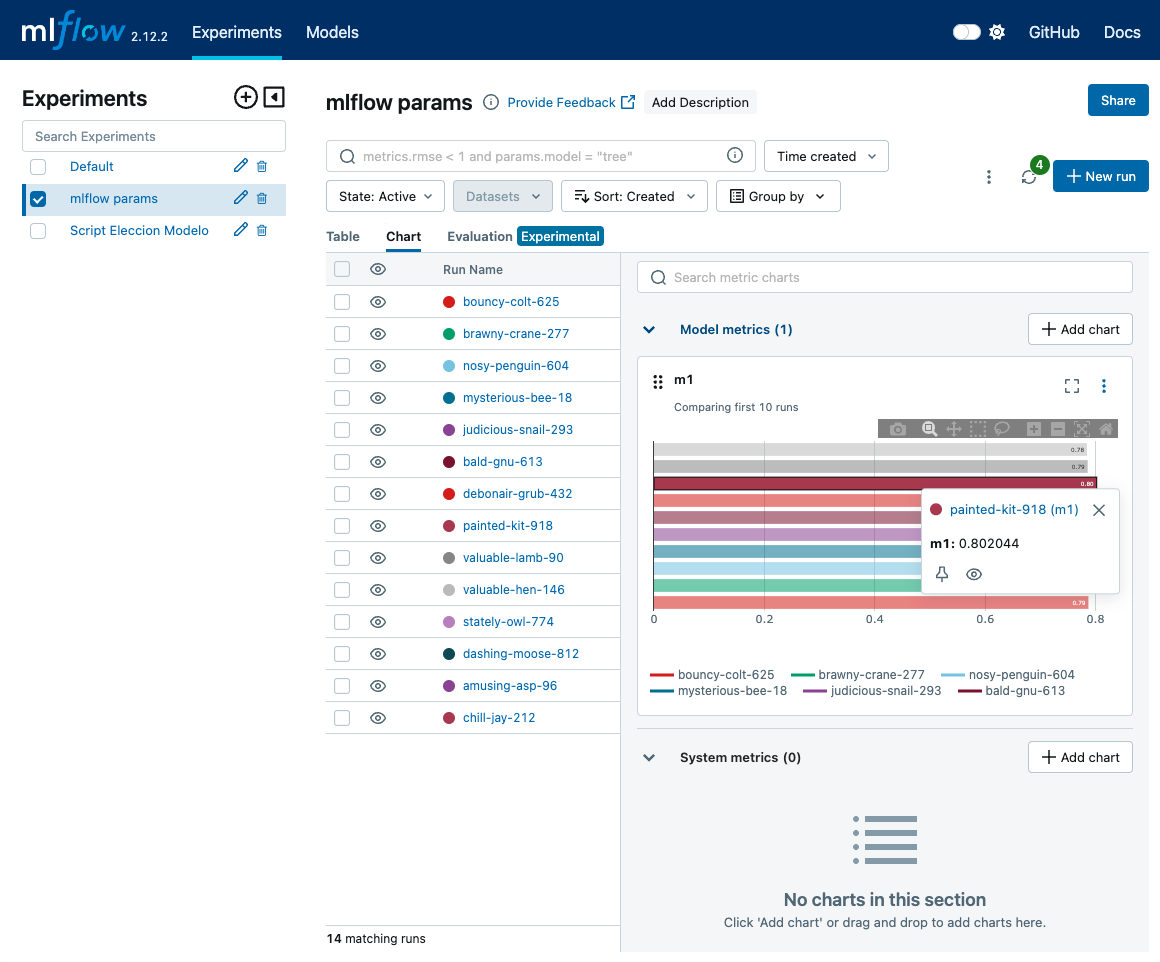

In [6]:
# Elegimos la métrica con mayor m1 para ver que contiene
common.show_image(base_path + 'mlflow_params_003.png')


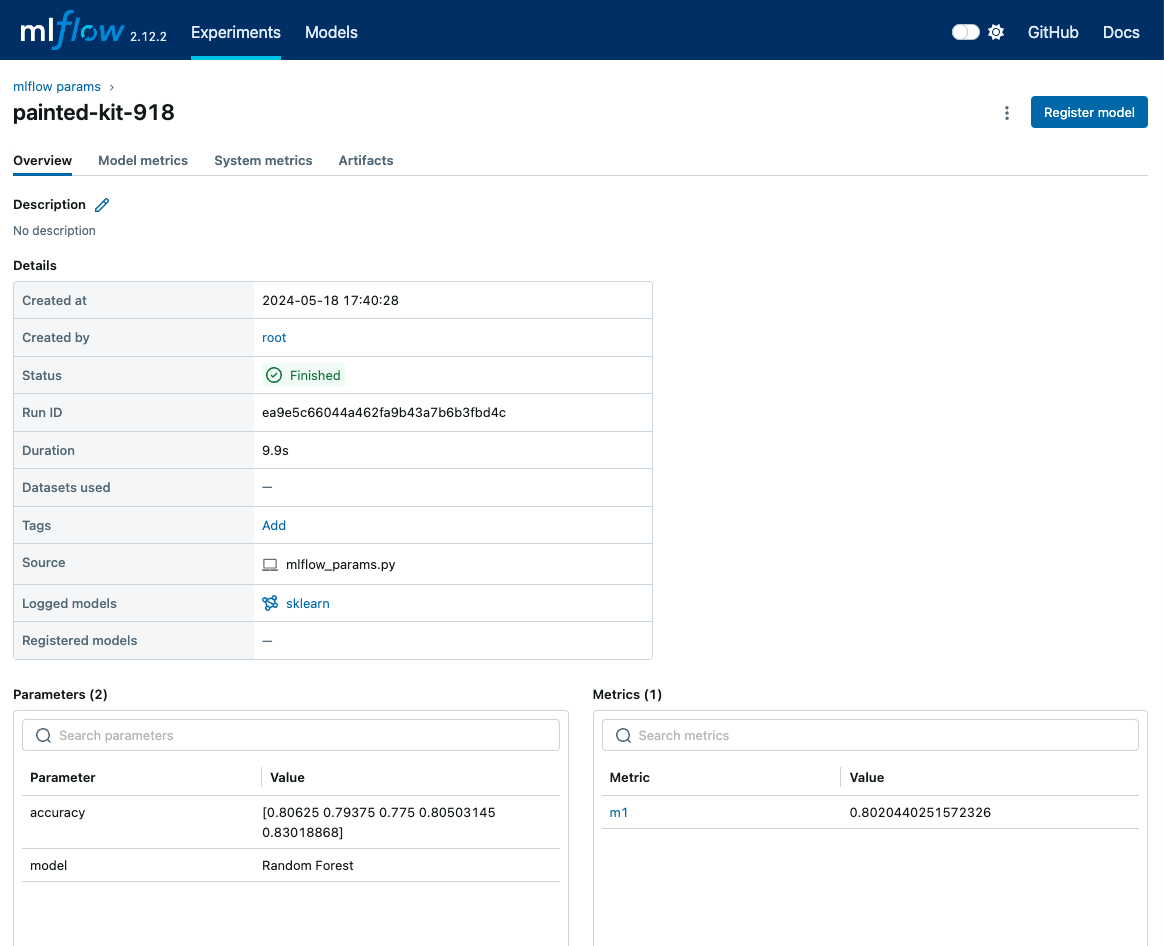

In [7]:
# Overview de la métrica con mejor m1
common.show_image(base_path + 'mlflow_params_004.png')

# Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF.

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes.

### 1. Captura de la pantalla docs con al menos 5 modulos.
### 2. Captura de cada una de los modulos con la respuesta dentro de docs.
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

In [8]:
! pip install fastapi
! pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 974.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Probamos la funcionalidad armada para obtener datos del modelo

In [9]:
# Importamos el archivo que vamos a usar para obtener resultados
# de los modelos entrenados
import fastapi_mlmodels

Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
LASSO: mean(accuracy)=0.787, std(accuracy)=0.008
KNN: mean(accuracy)=0.768, std(accuracy)=0.005
Decision Tree: mean(accuracy)=0.714, std(accuracy)=0.026
SVM: mean(accuracy)=0.784, std(accuracy)=0.014
Gradient Boosting: mean(accuracy)=0.786, std(accuracy)=0.015


In [10]:
# Probamos si podemos obtener los datos
# Es solo la llamada a la libreria que genera los resultados
# Aún no usamo fastapi
fastapi_mlmodels.get_best_model()

'Random Forest'

In [11]:
# Obtenemos los resultados de todos los modelos
fastapi_mlmodels.get_results()

{'Random Forest': {'cv_results': array([0.80625   , 0.79375   , 0.775     , 0.80503145, 0.83018868]),
  'mean': 0.8020440251572326,
  'std': 0.017993924611664467},
 'LASSO': {'cv_results': array([0.775     , 0.7875    , 0.7875    , 0.78616352, 0.79874214]),
  'mean': 0.7869811320754717,
  'std': 0.007524303672874936},
 'KNN': {'cv_results': array([0.775     , 0.7625    , 0.7625    , 0.7672956 , 0.77358491]),
  'mean': 0.7681761006289308,
  'std': 0.005310975371472267},
 'Decision Tree': {'cv_results': array([0.69375   , 0.7125    , 0.68125   , 0.72955975, 0.75471698]),
  'mean': 0.7143553459119497,
  'std': 0.02601623327869185},
 'SVM': {'cv_results': array([0.775     , 0.78125   , 0.775     , 0.77987421, 0.81132075]),
  'mean': 0.7844889937106918,
  'std': 0.013651466408610298},
 'Gradient Boosting': {'cv_results': array([0.80625   , 0.8       , 0.775     , 0.7672956 , 0.77987421]),
  'mean': 0.7856839622641509,
  'std': 0.01492610485249912}}

In [12]:
# Obtenemos los resultados de RandomForest y LASSO
fastapi_mlmodels.get_results(models_names=['RF', 'LS'])

{'Random Forest': {'cv_results': array([0.80625   , 0.79375   , 0.775     , 0.80503145, 0.83018868]),
  'mean': 0.8020440251572326,
  'std': 0.017993924611664467},
 'LASSO': {'cv_results': array([0.775     , 0.7875    , 0.7875    , 0.78616352, 0.79874214]),
  'mean': 0.7869811320754717,
  'std': 0.007524303672874936}}

### Probamos FastAPI

In [13]:
import nest_asyncio
from pyngrok import ngrok, conf
NGROK_TOKEN = "2gQVbcWww7nwPPFQXwacWQT9KeL_4T3qkQ1AJjDsUL6NzYMLN"
conf.get_default().auth_token = NGROK_TOKEN #cada uno os lo debéis generar en ngrok.

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()

Public URL: https://d79d-34-171-125-148.ngrok-free.app


In [16]:
%%writefile test.py
from fastapi import FastAPI

app = FastAPI()

@app.get('/')
def root():
  return {'message': 'Estas en la práctica de MLOps!!!!!',
          'status': '200 - OK'}

@app.get('/saluda')
def hello():
   return {'Message': 'Hola soy Juan'}

Writing test.py


In [17]:
! uvicorn test:app --port 8000

INFO:     Started server process [38777]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     2800:810:498:3009:352b:6042:712:1464:0 - "GET / HTTP/1.1" 200 OK
INFO:     2800:810:498:3009:352b:6042:712:1464:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2800:810:498:3009:352b:6042:712:1464:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2800:810:498:3009:352b:6042:712:1464:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     2800:810:498:3009:81af:b0ea:a5c9:e3e7:0 - "GET /saluda HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Finished server process [38777]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "uvloop/loop.pyx", line 1511, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1504, in uvloop.loop.Loop.run_until_complete
  File "uvloop/lo


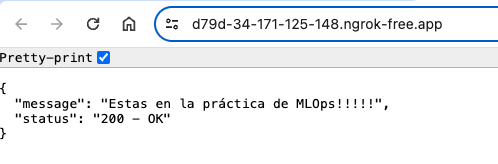

In [18]:
# Algunas capturas de pantalla
import common

base_path = ''

# Revisamos el root
common.show_image(base_path + 'fastapi_test_001.png')


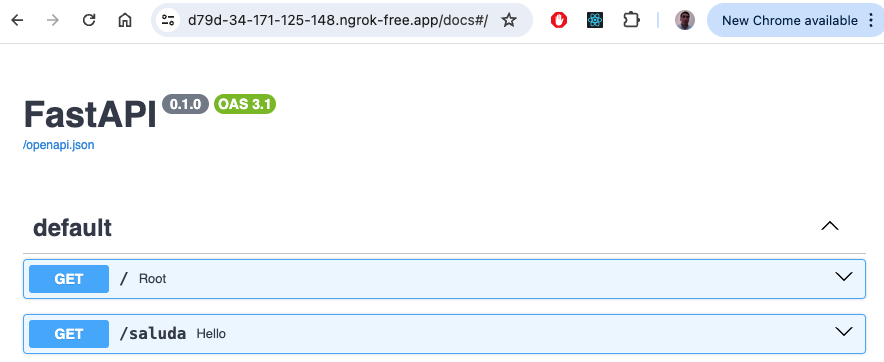

In [19]:
# Revisamos docs
common.show_image(base_path + 'fastapi_test_002.png')


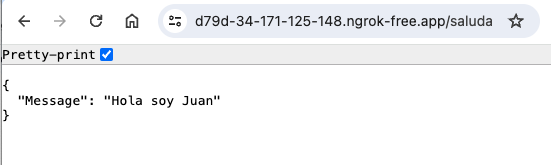

In [21]:
# Revisamos el llamado get a 'saluda'
common.show_image(base_path + 'fastapi_test_003.png')


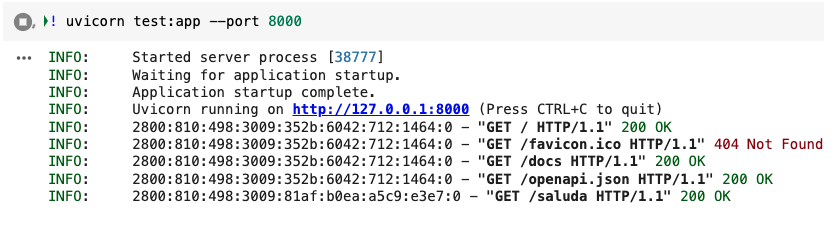

In [22]:
# Revisamos la ejecución en consola
common.show_image(base_path + 'fastapi_test_004.png')

### Obtenemos resultados del entrenamiento desde FastAPI

In [65]:
%%writefile test_models.py
from typing import Annotated
from fastapi import FastAPI, Query
import fastapi_mlmodels as ml

app = FastAPI()

@app.get('/')
def root():
  return {'message': 'Estas en la práctica de MLOps!!!!!',
          'status': '200 - OK'}

@app.get('/saluda')
def hello():
   return {'Message': 'Hola soy Juan'}

@app.get('/entrenamiento/mejor_modelo')
def best_model():
  return ml.get_best_model()

@app.get('/entrenamiento/resultados/')
def read_items(q: Annotated[list[str] | None, Query()] = None):
  results = {}
  print(f'models: {q}')
  if q != None:
    print("pasa por results con modelos")
    results = ml.get_results(q)
  else:
    print("usa el default")
    results = ml.get_results()
    print(results)

  return { "results": f'{results}' }

Overwriting test_models.py


In [66]:
import nest_asyncio
from pyngrok import ngrok, conf
NGROK_TOKEN = "2gQVbcWww7nwPPFQXwacWQT9KeL_4T3qkQ1AJjDsUL6NzYMLN"
conf.get_default().auth_token = NGROK_TOKEN #cada uno os lo debéis generar en ngrok.

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()

Public URL: https://3c16-34-171-125-148.ngrok-free.app


In [77]:
! uvicorn test_models:app --port 8000

Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
LASSO: mean(accuracy)=0.787, std(accuracy)=0.008
KNN: mean(accuracy)=0.768, std(accuracy)=0.005
Decision Tree: mean(accuracy)=0.714, std(accuracy)=0.026
SVM: mean(accuracy)=0.784, std(accuracy)=0.014
Gradient Boosting: mean(accuracy)=0.786, std(accuracy)=0.015
INFO:     Started server process [64625]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Finished server process [64625]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "uvloop/loop.pyx", line 1511, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1504, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1377, in uvloop.loop.Loop.run_forever
  File "uvloop/loop.pyx", line 555, in uvloop.


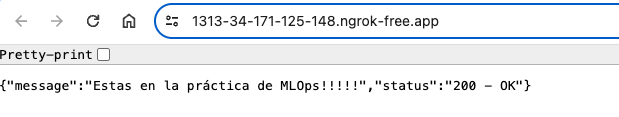

In [68]:
# Algunas capturas de pantalla
import common

base_path = ''

# Revisamos el root
common.show_image(base_path + 'fastapi_ml_001.png')


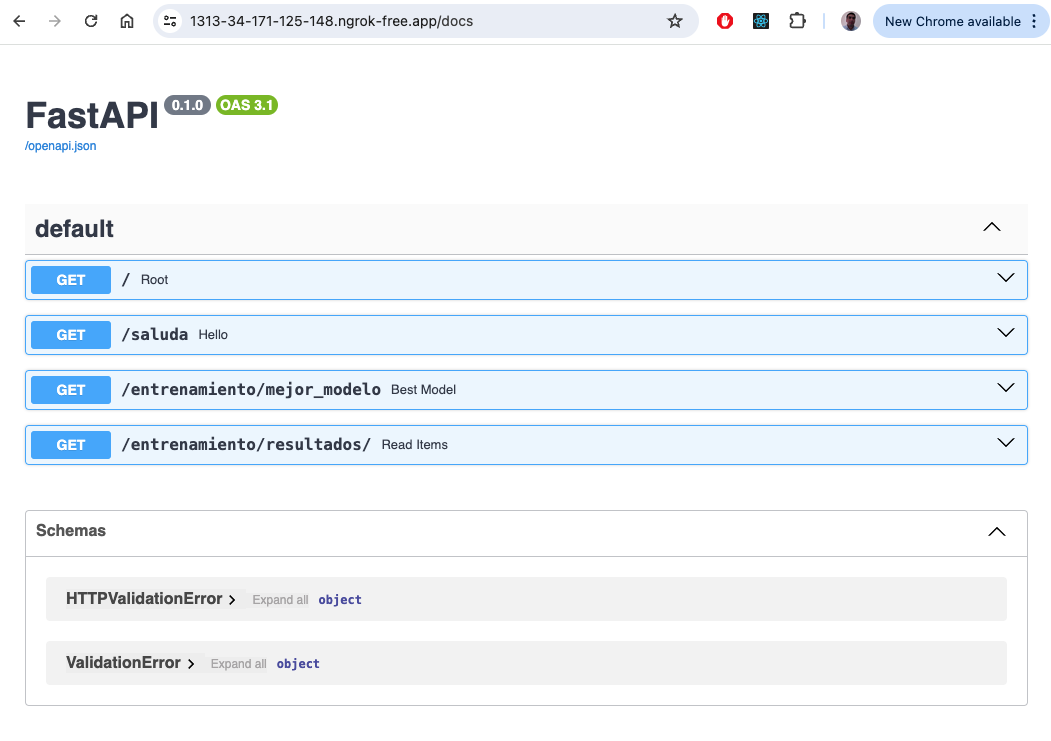

In [69]:
# Revisamos docs
common.show_image(base_path + 'fastapi_ml_002.png')


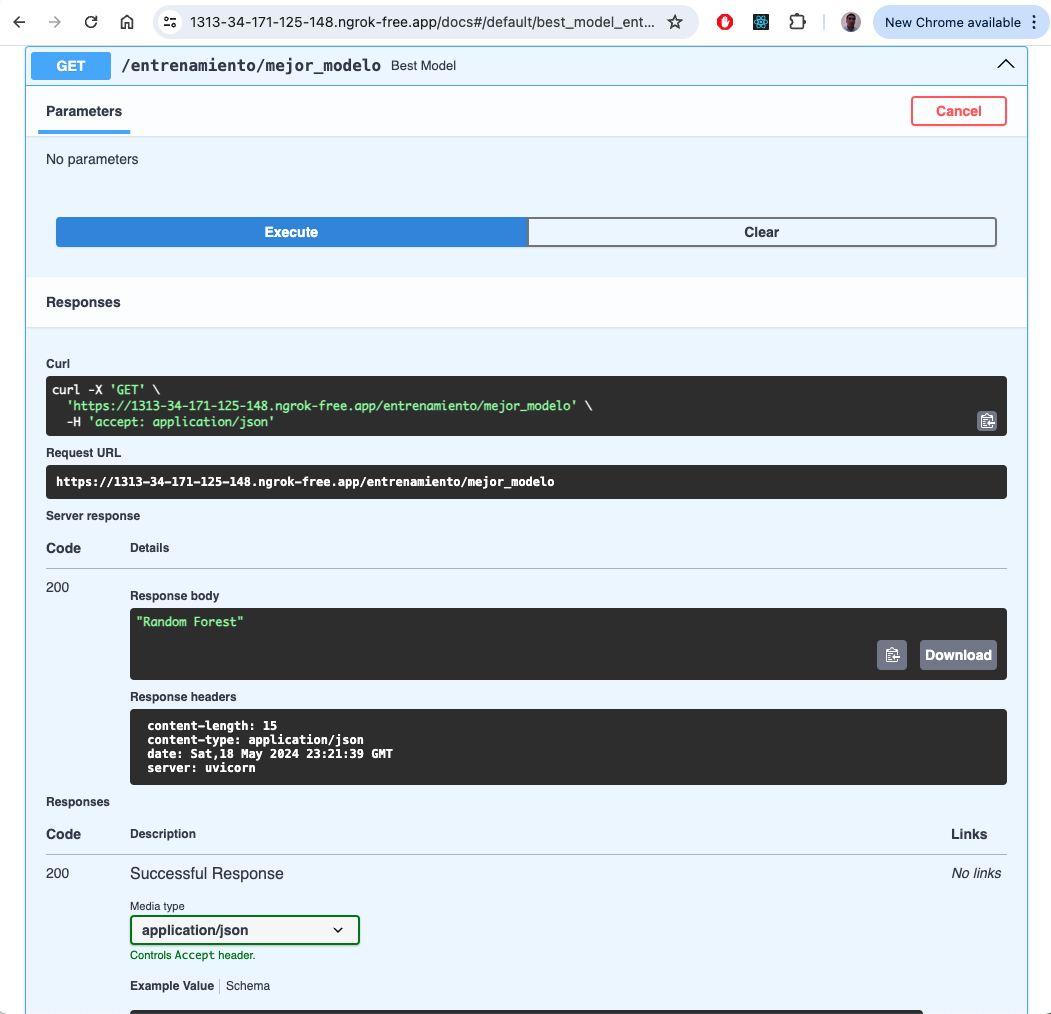

In [70]:
# Revisamos ejecutamos desde docs 'entrenamiento/mejor_modelo'
common.show_image(base_path + 'fastapi_ml_003.png')


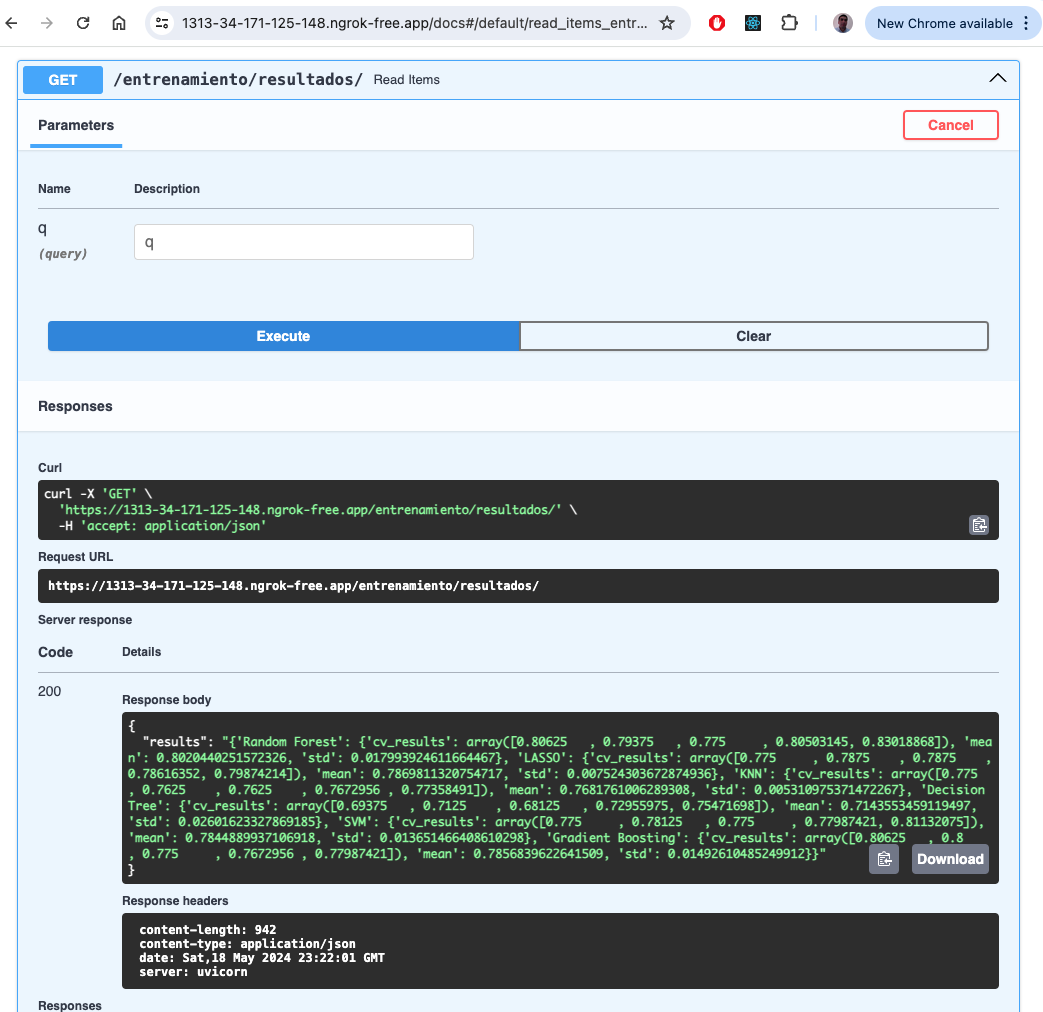

In [71]:
# Revisamos ejecutamos desde docs 'entrenamiento/resultados/'
# Sin parámetros y obtenemos el resultado por default
common.show_image(base_path + 'fastapi_ml_004.png')


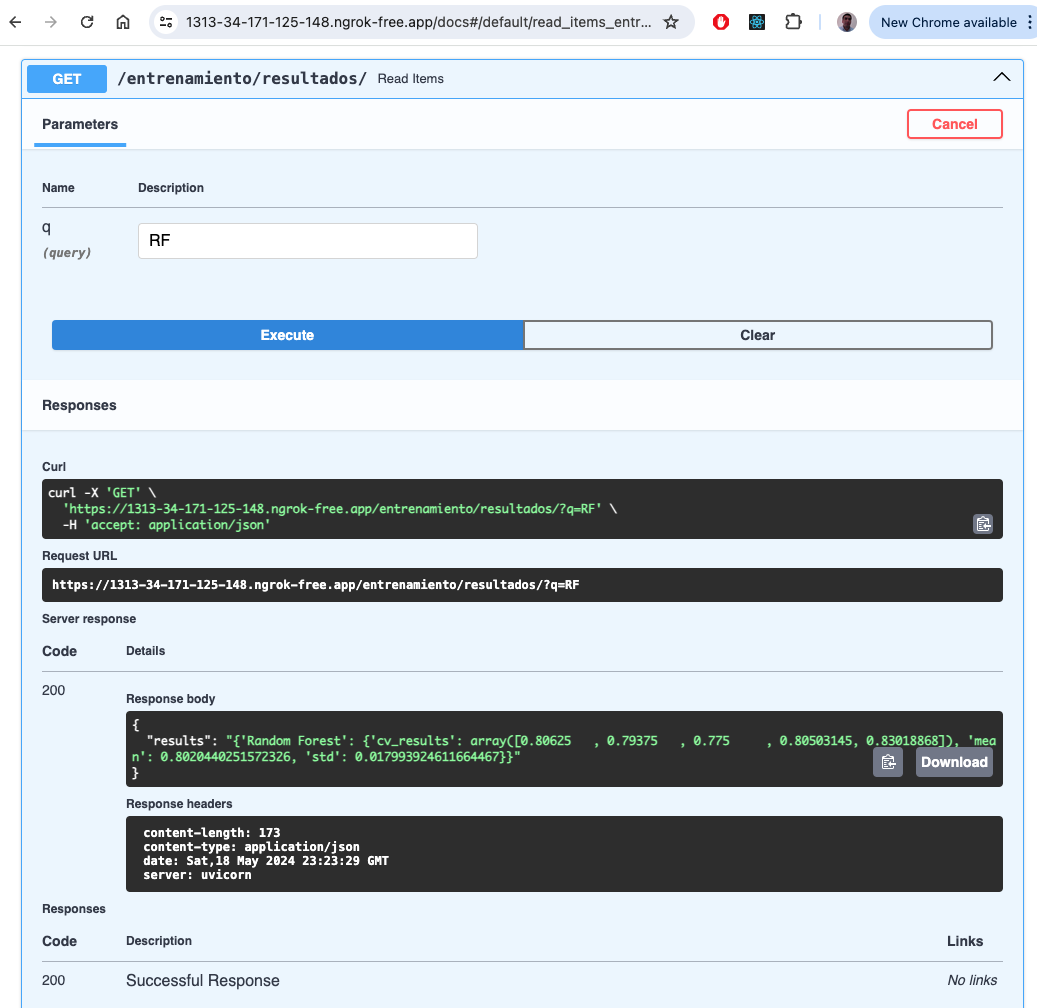

In [72]:
# Revisamos ejecutamos desde docs 'entrenamiento/resultados/'
# Solamente con el parámetro 'q=RF'
# para que nos retorne el resultado del modelo Random Forest
common.show_image(base_path + 'fastapi_ml_005.png')


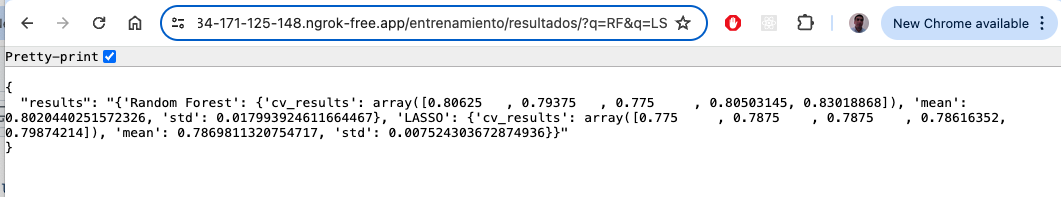

In [73]:
# Revisamos ejecutamos desde la URL 'entrenamiento/resultados/'
# Con 2 parámetros 'q=RF' y 'q='LS'
# para que nos retorne el resultado de los modelo Random Forest y Lasso
common.show_image(base_path + 'fastapi_ml_006.png')


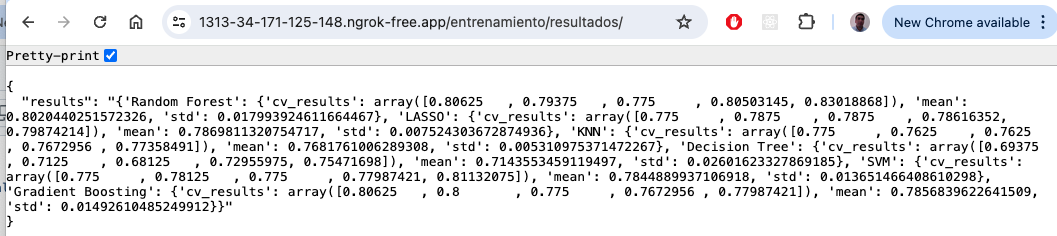

In [74]:
# Revisamos ejecutamos desde la URL 'entrenamiento/resultados/'
# Sin parámetros para que nos retorne el resultado default
common.show_image(base_path + 'fastapi_ml_007.png')


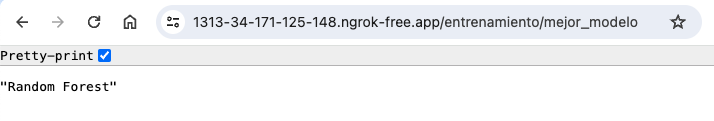

In [75]:
# Revisamos ejecutamos desde la URL 'entrenamiento/mejor_modelo/'
common.show_image(base_path + 'fastapi_ml_008.png')


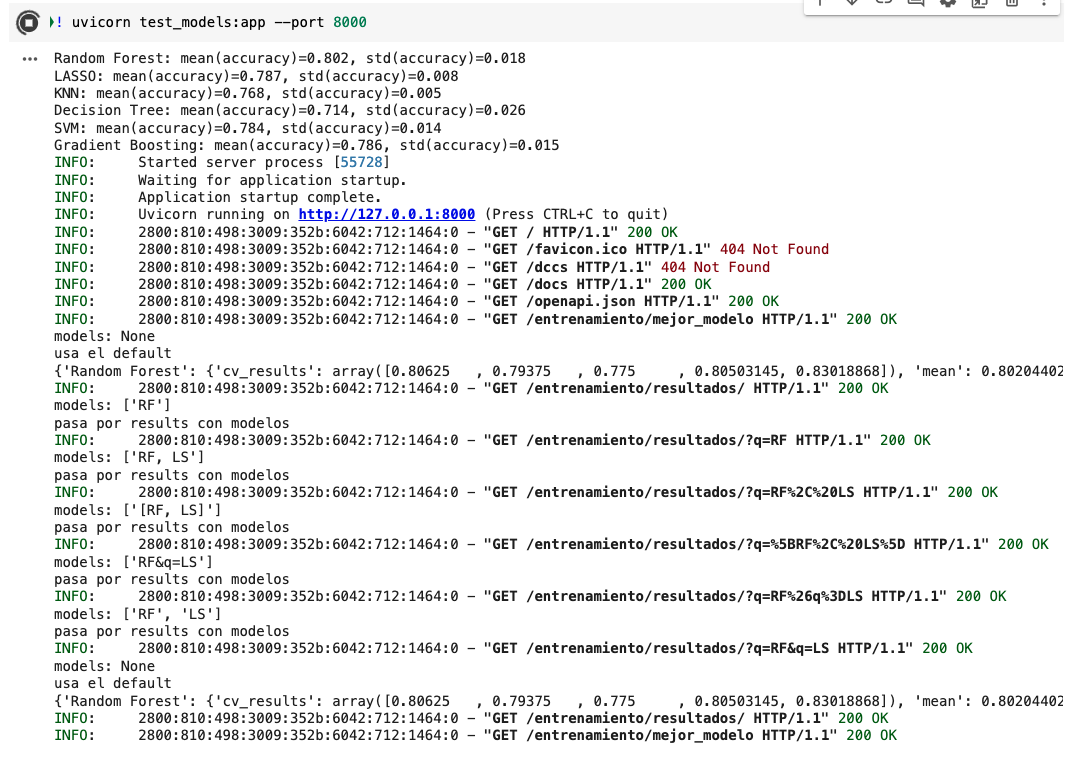

In [76]:
# Revisamos la ejecución en consola
common.show_image(base_path + 'fastapi_ml_009.png')

### Agregamos HF dentro de las consultas de FastAPI

In [78]:
! pip install transformers

In [79]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ['I hate you, but I love you at the same time']
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9996761083602905}]

In [80]:
from transformers import pipeline

# URL donde se extrajo el texto y se lo acondiciono
# https://es.wikipedia.org/wiki/F%C3%BAtbol_en_Argentina
text = '''
El fútbol en Argentina es el deporte más popular del país.
Es el que tiene más jugadores federados (900 000 en 2019),
y el más practicado por la población masculina y femenina en forma recreativa,
desde la niñez, en la que alcanza a la casi totalidad, hasta más allá de los sesenta años.
Asimismo, nueve de cada diez habitantes declaran ser simpatizantes de algún equipo de fútbol.
En el habla popular del país, también se suele utilizar las expresiones «fúbol»,
«fulbo» o «chuti» (esta última en el noroeste) para designarlo.
​También resulta muy común utilizar la expresión «jugar a la pelota»,
en referencia a la práctica del fútbol.
El estilo de juego aplicado tradicionalmente por los futbolistas argentinos es denominado «fútbol de potrero»,
enmarcado dentro del «fútbol sudamericano», de carácter individual improvisado.
El 22 de junio se celebra el Día del Futbolista Argentino,
mientras que el 21 de agosto se celebra el Día de las Futbolistas Argentinas.
'''

classifier = pipeline("summarization")
classifier(text)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' El fútbol en Argentina es el deporte más popular del país . Es el that tiene más jugadores federados (900 000 in 2019) El 22 de junio se celebra el Día del Futbolista Argentino, el 21 de agosto de las Futbolistas Argentinas .'}]

In [81]:
# Hacemos lo mismo pero utilizando un modelo en castellano
classifier = pipeline("summarization",
                      model='mrm8488/bloom-560m-finetuned-wikilingua-spanish-summarization')
classifier(text)

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/268 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

The model 'BloomForCausalLM' is not supported for summarization. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'SeamlessM4TForTextToText', 'SeamlessM4Tv2ForTextToText', 'SwitchTransformersForConditionalGeneration', 'T5ForConditionalGeneration', 'UMT5ForConditionalGeneration', 'XLMProphetNetForConditionalGeneration'].
/usr/local/lib/python3.10/dist-packages/transformers/generation/

ValueError: Input length of input_ids is 215, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [82]:
# Como NO funciono buscamos otro modelo para probar

# Hacemos lo mismo pero utilizando un modelo en castellano
classifier = pipeline("summarization",
                      model='josmunpen/mt5-small-spanish-summarization')
classifier(text)

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.33M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

[{'summary_text': 'el fútbol en argentino es el deporte más popular del país'}]

### Ejecutamos fastAPI directamente desde el archivo

In [83]:
import nest_asyncio
from pyngrok import ngrok, conf
NGROK_TOKEN = "2gQVbcWww7nwPPFQXwacWQT9KeL_4T3qkQ1AJjDsUL6NzYMLN"
conf.get_default().auth_token = NGROK_TOKEN #cada uno os lo debéis generar en ngrok.

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()

Public URL: https://d33f-34-171-125-148.ngrok-free.app


In [84]:
! uvicorn fastapi_hf:app --port 8000

Random Forest: mean(accuracy)=0.802, std(accuracy)=0.018
LASSO: mean(accuracy)=0.787, std(accuracy)=0.008
KNN: mean(accuracy)=0.768, std(accuracy)=0.005
Decision Tree: mean(accuracy)=0.714, std(accuracy)=0.026
SVM: mean(accuracy)=0.784, std(accuracy)=0.014
Gradient Boosting: mean(accuracy)=0.786, std(accuracy)=0.015
2024-05-19 00:43:14.771031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 00:43:14.771099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 00:43:14.773276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-19 00:43:16.532336: W tensorflow/compil


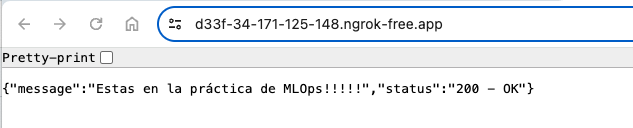

In [85]:
# Algunas capturas de pantalla
import common

base_path = ''

# Revisamos el root
common.show_image(base_path + 'fastapi_hf_001.png')


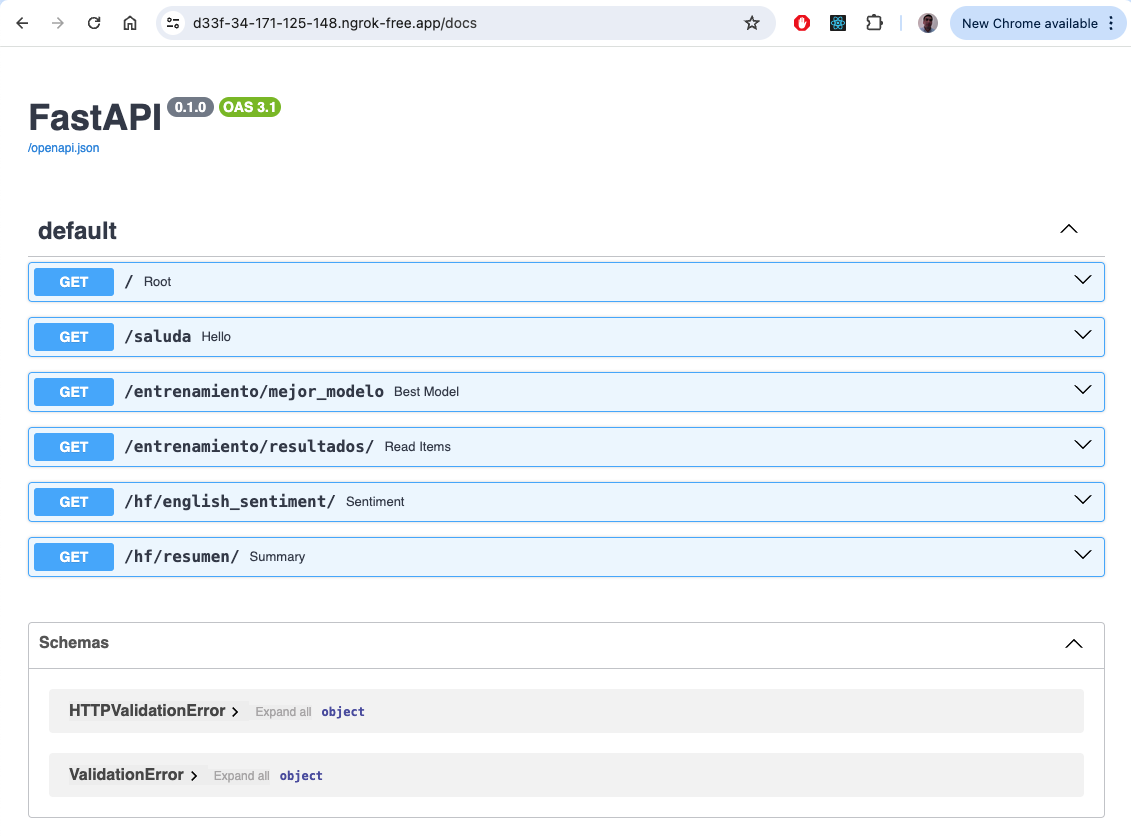

In [86]:
# Revisamos docs
common.show_image(base_path + 'fastapi_hf_002.png')


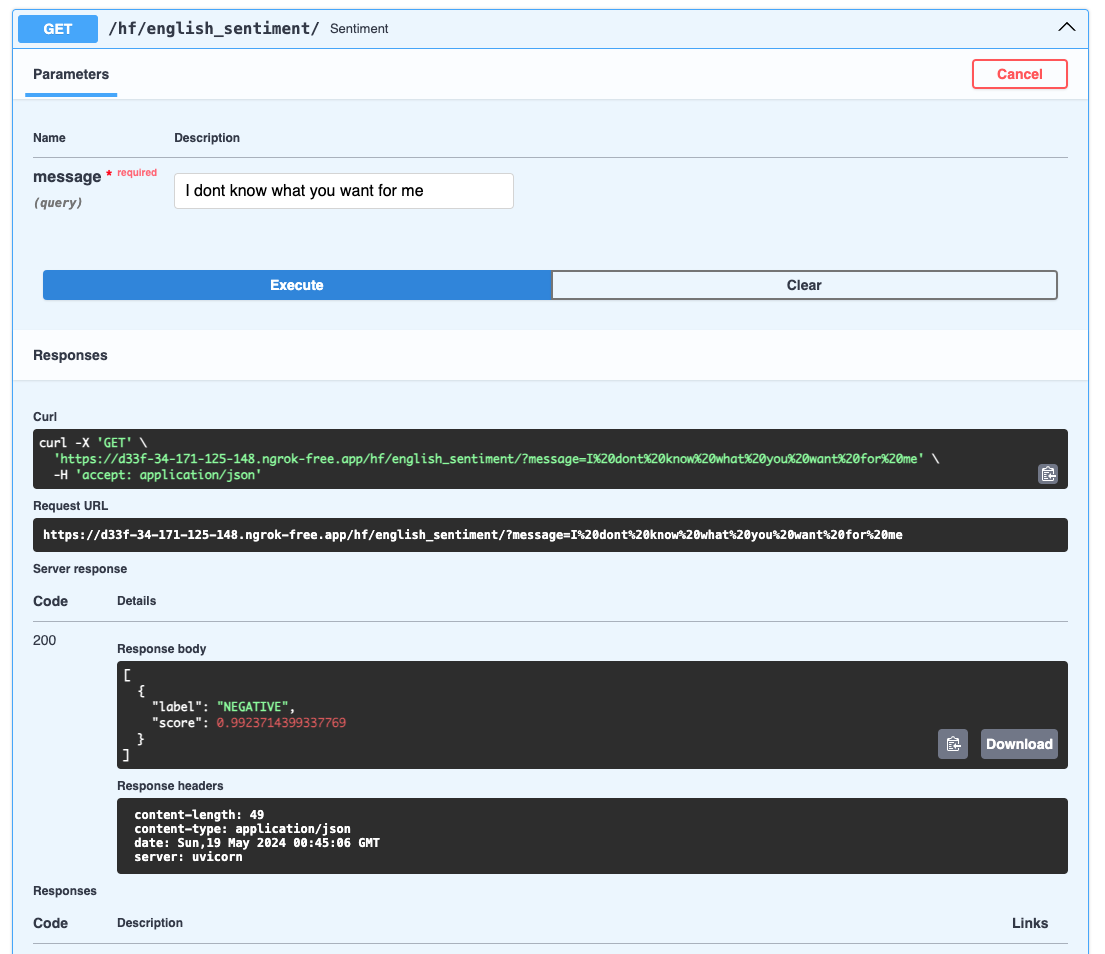

In [88]:
# Consultamos desde docs a '/hf/english_sentiment'
common.show_image(base_path + 'fastapi_hf_003.png')


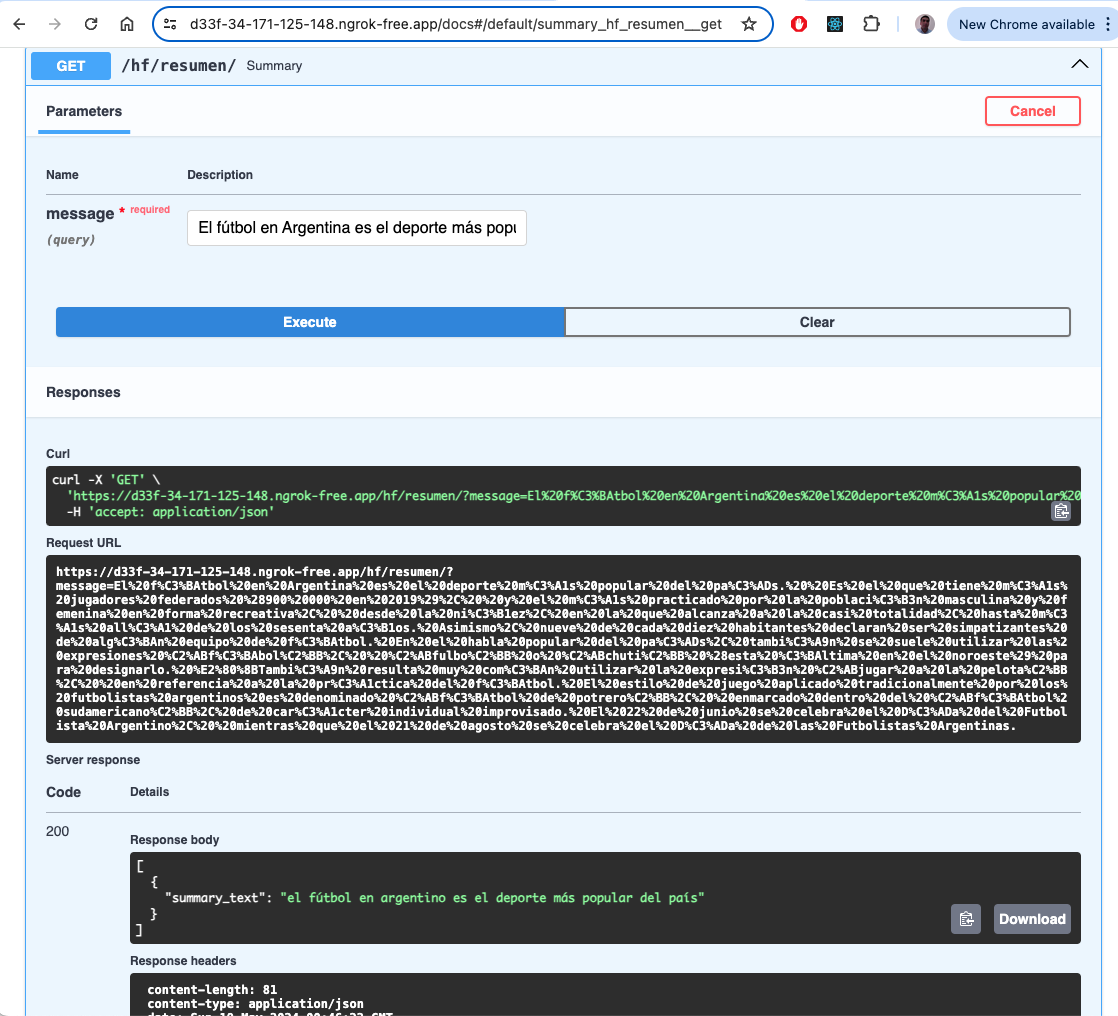

In [90]:
# Consultamos desde docs a '/hf/resumen'
common.show_image(base_path + 'fastapi_hf_004.png')


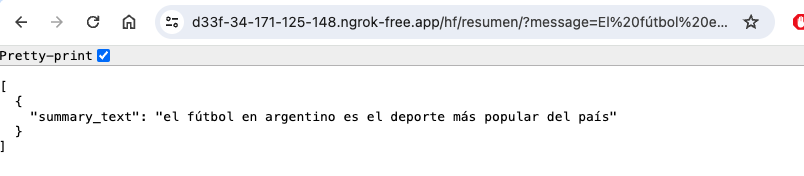

In [91]:
# Consultamos desde la url a '/hf/resumen'
common.show_image(base_path + 'fastapi_hf_005.png')


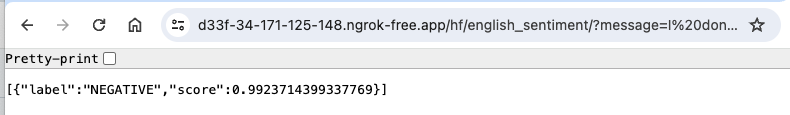

In [92]:
# Consultamos desde la url a '/hf/english_sentiment'
common.show_image(base_path + 'fastapi_hf_006.png')


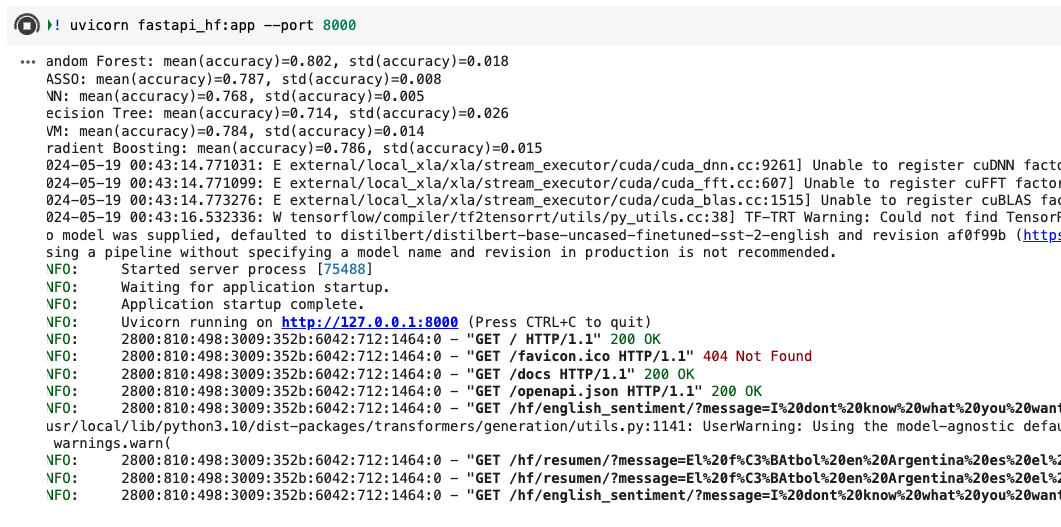

In [93]:
# Revisamos el log de fastAPI
common.show_image(base_path + 'fastapi_hf_007.png')